 # Red Wine Quality

 ## Import the libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
sns.set()


## Import the dataset

In [23]:
df_wine = pd.read_csv(r"winequality-red.csv", sep=";")


 ## Exploratory Data Analysis

In [24]:
df_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
df_wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 Counting, unique values in the quality feature of the dataset

In [26]:
unique, counts = np.unique(df_wine["quality"], return_counts=True)
print(np.asarray((unique, counts)).T)


[[  3  10]
 [  4  53]
 [  5 681]
 [  6 638]
 [  7 199]
 [  8  18]]


In [27]:
df_wine["quality"]


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [29]:
df_wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

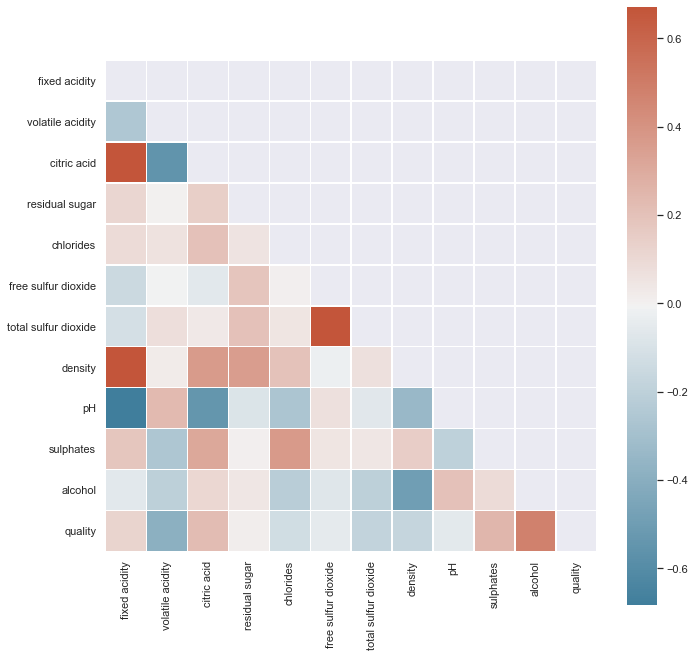

In [30]:
corr = df_wine.corr()
fig, ax = plt.subplots(figsize=(11, 11))
mask = np.triu(df_wine.corr())
sns.heatmap(corr, ax=ax, cmap=sns.diverging_palette(230, 20, as_cmap=True), square=True, mask=mask, linewidths=.5)
plt.show()


<AxesSubplot:xlabel='quality', ylabel='Density'>

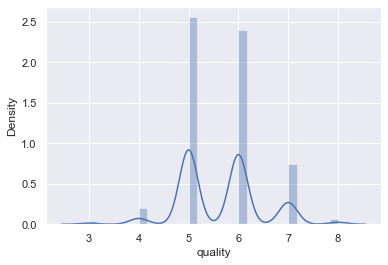

In [31]:
sns.distplot(df_wine["quality"])
# sns.distplot

 According to the above graph, it is obvious that the target feature "quality" is highly biased so we had to do over-sampling or undersampling.<br>And since the data is limited we had to do oversampling.

 ## Data Preprocessing

Splitting the data in input variables and output variables

In [32]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values


 Encoding the wine quality

In [33]:
encoder = LabelEncoder()
df_wine["quality"] = encoder.fit_transform(df_wine["quality"])


In [34]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0  10]
 [  1  53]
 [  2 681]
 [  3 638]
 [  4 199]
 [  5  18]]


 ### Oversampling
  Since we know that the data is highly biased on some values in the quality feature, we are using oversampling method to solve this problem

In [35]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)


In [36]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0 681]
 [  1 681]
 [  2 681]
 [  3 681]
 [  4 681]
 [  5 681]]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)


In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3268, 11)
(3268,)
(818, 11)
(818,)


### Scaling the training features
 Since there are no categorical features, we just had to scale the training features and they all have data-type float64

In [39]:
scaling_list = df_wine.select_dtypes(["int64", "float64"]).columns
scaling_list


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 ## Model Training
 Using many different ML models from linear regressor to xgboost regressor


### Linear Regressor

In [41]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).round()
y_pred = y_pred.astype(int)
y_test = np.array(y_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.88      0.34      0.49       137
           1       0.29      0.36      0.32       136
           2       0.36      0.57      0.44       136
           3       0.31      0.28      0.30       137
           4       0.32      0.43      0.37       136
           5       0.68      0.38      0.49       136

    accuracy                           0.39       818
   macro avg       0.41      0.34      0.34       818
weighted avg       0.48      0.39      0.40       818



### Support Vector Regressor with GridSearchCV

In [42]:
regressor = SVR()
parameters = [{"kernel": ["linear"], "gamma": [i for i in np.arange(0.1, 1.0, 0.1)]},
              {"kernel": ["rbf"], "gamma":[i for i in np.arange(0.1, 1.0, 0.1)]}]
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           scoring="accuracy",
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Params: ", grid_search.best_params_)


Best Params:  {'gamma': 0.1, 'kernel': 'linear'}


 ### SVR model training

In [43]:
regressor = SVR(gamma=0.1, kernel="linear")
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).round()
y_pred = y_pred.astype(int)
y_test = np.array(y_test)
print(classification_report(y_test, y_pred))
set(y_test) - set(y_pred)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.89      0.45      0.60       137
           1       0.32      0.38      0.35       136
           2       0.36      0.54      0.44       136
           3       0.35      0.28      0.31       137
           4       0.34      0.41      0.37       136
           5       0.69      0.51      0.59       136
           6       0.00      0.00      0.00         0

    accuracy                           0.43       818
   macro avg       0.37      0.32      0.33       818
weighted avg       0.49      0.43      0.44       818



set()

 ### Random Forest Regressor

In [44]:
regressor = RandomForestRegressor(max_depth=50, n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).round()
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       137
         1.0       0.92      0.83      0.87       136
         2.0       0.62      0.79      0.69       136
         3.0       0.67      0.53      0.59       137
         4.0       0.81      0.85      0.83       136
         5.0       0.96      0.95      0.96       136

    accuracy                           0.82       818
   macro avg       0.83      0.82      0.82       818
weighted avg       0.83      0.82      0.82       818



### Decision Tree Regressor with GridSearchCV

In [45]:
regressor = DecisionTreeRegressor()
parameters = [{"criterion": ["mse"], "max_features":["auto", "sqrt", "log2"]},
              {"criterion": ["friedman_mse"], "max_features":["auto", "sqrt", "log2"]},
              {"criterion": ["mae"], "max_features":["auto", "sqrt", "log2"]}]
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           scoring="accuracy",
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_acc = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy {:.2f} %".format(best_acc*100))
print("Best Params: ", grid_search.best_params_)


Best Accuracy 75.76 %
Best Params:  {'criterion': 'mse', 'max_features': 'auto'}


In [46]:
regressor = DecisionTreeRegressor(criterion="friedman_mse", max_features="auto")
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).round()
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       137
         1.0       0.77      0.78      0.77       136
         2.0       0.62      0.61      0.61       136
         3.0       0.61      0.53      0.57       137
         4.0       0.78      0.84      0.81       136
         5.0       0.91      0.93      0.92       136

    accuracy                           0.78       818
   macro avg       0.77      0.78      0.77       818
weighted avg       0.77      0.78      0.77       818



 ### K Nearest Neighbors

In [47]:
regressor = KNeighborsRegressor(n_neighbors=7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).round()
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       137
         1.0       0.85      0.90      0.88       136
         2.0       0.54      0.50      0.52       136
         3.0       0.46      0.37      0.41       137
         4.0       0.73      0.73      0.73       136
         5.0       0.86      0.99      0.92       136

    accuracy                           0.75       818
   macro avg       0.73      0.75      0.74       818
weighted avg       0.73      0.75      0.74       818



 ### XgBoost Regression

In [48]:
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores


array([-0.33825729, -0.26554888, -0.29632036, -0.31049834, -0.30953836,
       -0.28291878, -0.28685447, -0.30796612, -0.26942069, -0.26040972,
       -0.28855077, -0.25497708, -0.29023834, -0.35904449, -0.27411154,
       -0.29186191, -0.24858188, -0.29111475, -0.28420218, -0.30516095,
       -0.29066071, -0.32864511, -0.28621449, -0.31646394, -0.31301692,
       -0.30589626, -0.2862837 , -0.23142889, -0.24704786, -0.2925973 ])

In [49]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))


Mean MAE: 0.290 (0.027)
